___
___
# Linear Regression Example

Uses fake customer data from "Pieran Data"

Context: Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

Goal: decide whether to focus efforts on mobile app experience or website.

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

Ecommerce Customers csv file
It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Read Ecommerce Customers csv file as a DataFrame**

In [3]:
ecomCust = pd.read_csv('data/Ecommerce Customers')

**Check dataframe**

In [5]:
ecomCust.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [6]:
ecomCust.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
ecomCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Data Analysis

In [9]:
ecomCust.columns

Index([u'Email', u'Address', u'Avatar', u'Avg. Session Length', u'Time on App',
       u'Time on Website', u'Length of Membership', u'Yearly Amount Spent'],
      dtype='object')

**Compare the Time on Website and Yearly Amount Spent columns.**

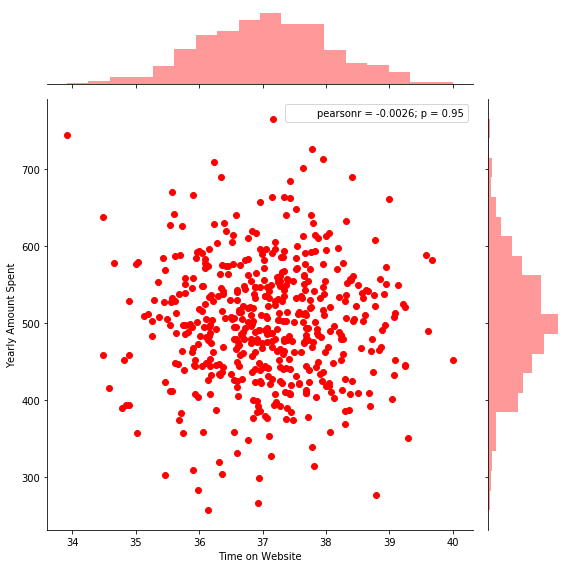

In [11]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=ecomCust, kind='scatter',color='r', size=8, ratio=5, space=0.2)

No obvious correlation

**Compare the Time on App and Yearly Amount Spent columns.**

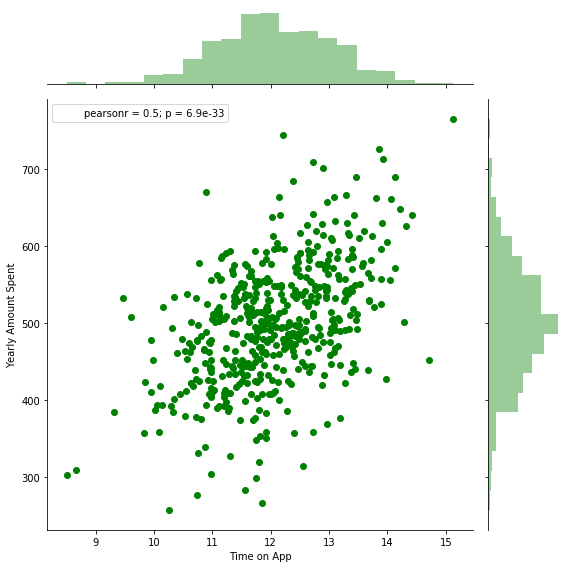

In [13]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=ecomCust, kind='scatter',color='g', size=8, ratio=5, space=0.2)

Seems to have small correlation

**Explore relationships across the entire data set.**

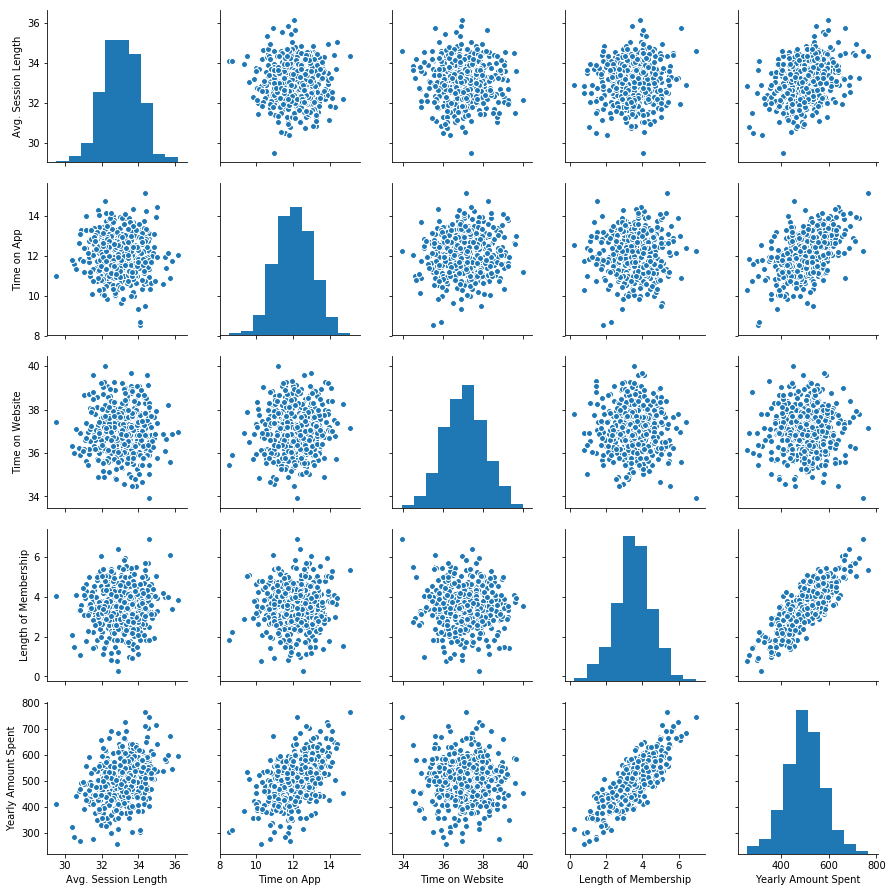

In [17]:
sns.pairplot(ecomCust, hue=None, hue_order=None, palette='Set1',
             kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1)

Length of Menbership seems to be the most correlated feature with Yearly Amount Spent

**linear model plot of  Yearly Amount Spent vs. Length of Membership**

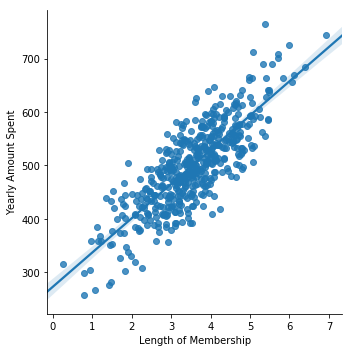

In [19]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=ecomCust)

## Training and Testing Data

Split the data into training and testing sets.

In [22]:
ecomCust.columns

Index([u'Email', u'Address', u'Avatar', u'Avg. Session Length', u'Time on App',
       u'Time on Website', u'Length of Membership', u'Yearly Amount Spent'],
      dtype='object')

In [23]:
 ## Set X equal to the numerical features of the dataframe
X = ecomCust[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
## Set y equal to the "Yearly Amount Spent" column (our target)
y = ecomCust['Yearly Amount Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [24]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Import LinearRegression from sklearn.linear_model**

In [26]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm**

In [39]:
lm = LinearRegression()

**Train/fit lm onthe training data.**

In [40]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [41]:
print('Coefficients:{}'.format(lm.coef_))

Coefficients:[ 25.78768866  38.855406     0.15142971  61.30544827]


**Predict off the X_test set of the data.**

In [42]:
predicted_y = lm.predict(X_test)

**Scatterplot of the real test values versus the predicted values**

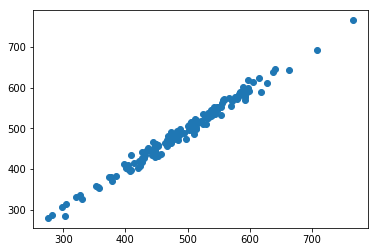

In [43]:
plt.scatter(y_test,predicted_y)

## Model Evaluation

**Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

In [34]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

('MAE:', 8.179471342889796)
('MSE:', 106.72368414265766)
('RMSE:', 10.330715567793824)


In [45]:
metrics.explained_variance_score(y_test,predicted_y)

0.98457200702470538

## Residuals


**Histogram of the residuals**

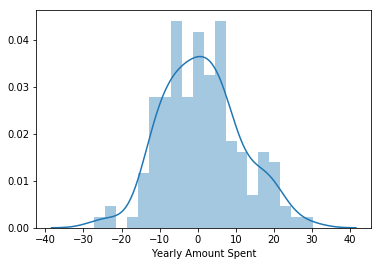

In [49]:
sns.distplot((y_test-predicted_y),bins=20)

## Conclusion

In [50]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.787689
Time on App,38.855406
Time on Website,0.151430
Length of Membership,61.305448


Length of Membership the most important